In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Siamo in notebooks/, saliamo di un livello per arrivare alla root del progetto
ROOT = Path().resolve().parents[0]
DATA_DIR = ROOT / "examples" / "data"

def draw(pattern, dpi=50, save=None, show=True):

    from motionpattern.plot_pattern import _decode_pattern_uint64

    pattern_np = np.array(list(map(int,np.binary_repr(pattern, width = 27)))).reshape(3,3,3)
    # Path to the image (update for current environment if needed)
    directory_sfondo = Path(r"C:\Users\braua\Documents\TesiMagistrale\DATI\GRAFICI\template_pattern.tif")

    img = np.array( Image.open(directory_sfondo).convert("RGB") )

    mappa_indici_da_riempire = {}
    for t in range(3):
        for i in range(3):
            for j in range(3):
                target_rgb = (1 + 9*t + 3*i + j , 0, 0)
                # Find indices where the pixel matches the target RGB value
                matching_indices = np.argwhere(np.all(img == target_rgb, axis=-1))
                mappa_indici_da_riempire[1 + 9*t + 3*i + j] = matching_indices


    for t in range(3):
        for i in range(3):
            for j in range(3):
                key = 1 + 9*t + 3*i + j
                value = int(pattern_np[2 - t, i, j] * 255)
                rgb = (value,value,value)
                for (y, x) in mappa_indici_da_riempire[key]:
                    img[y, x] = rgb

    if save:
        out_path = Path(save)
        Image.fromarray(img).save(out_path)
        print(f"Immagine salvata in: {out_path}")

    if show:
        plt.figure(figsize=(10, 10), dpi=dpi)
        plt.imshow(img)
        plt.axis('off')
        plt.tight_layout(pad=0)
        plt.show()


Index([134217247,    224767,  66977791, 134201343,  83623936, 126091263,
       119537664, 109051904, 132120575, 130023424,
       ...
       133957632, 100860288,    150015,      1024, 134086399, 134217439,
       132641785,       217,      2559, 133169152],
      dtype='int64', name='PatternValue', length=211)


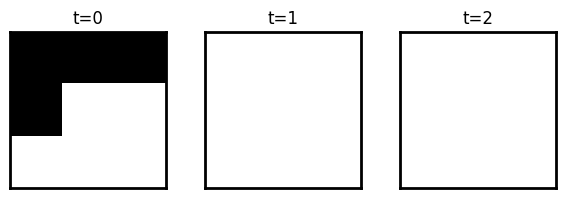

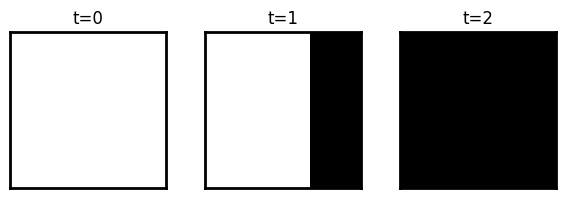

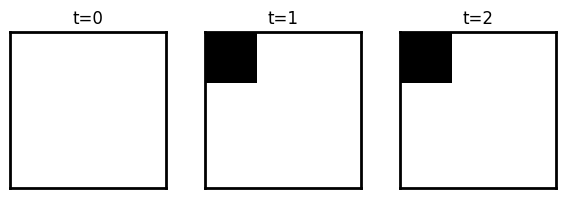

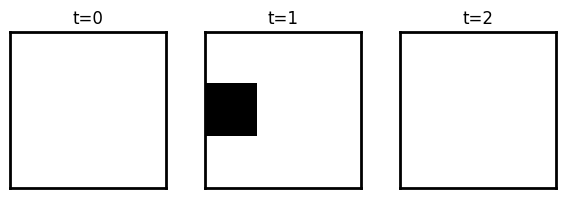

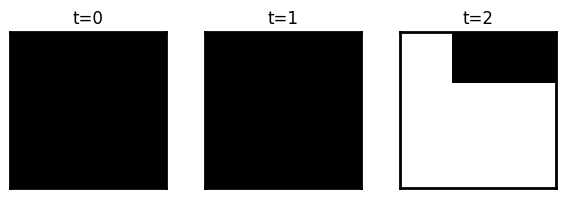

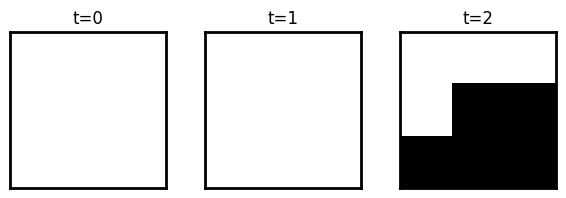

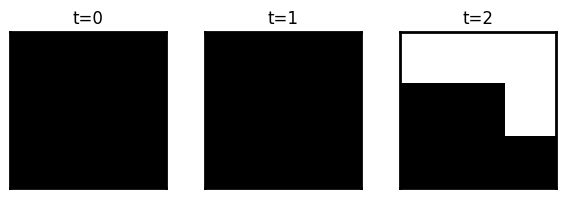

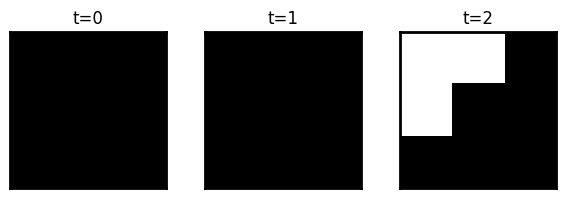

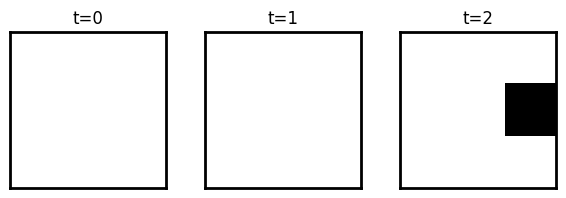

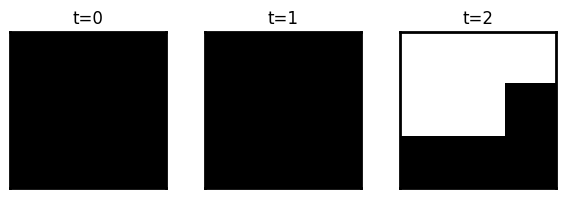

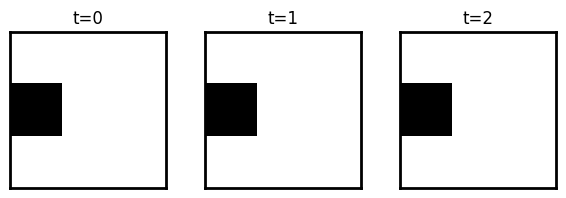

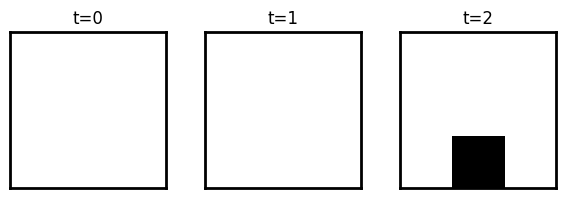

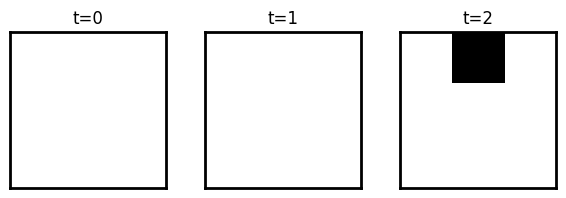

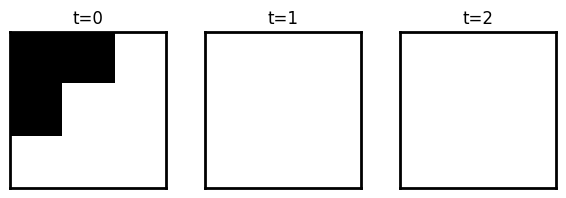

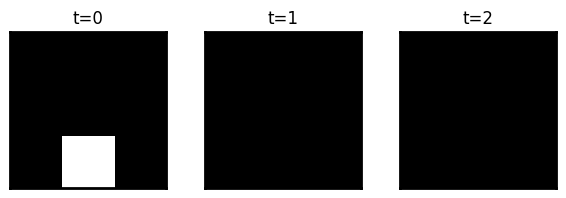

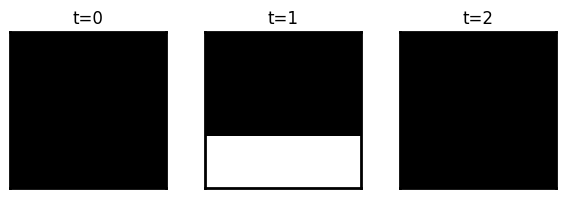

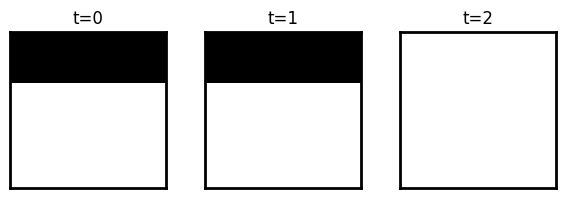

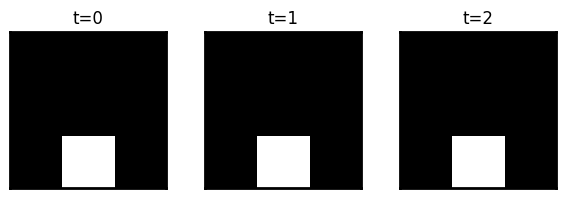

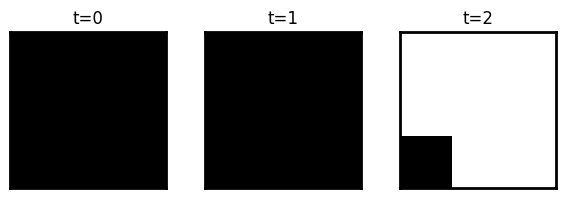

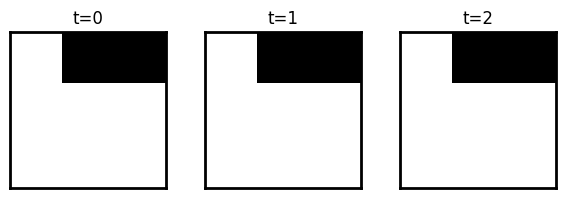

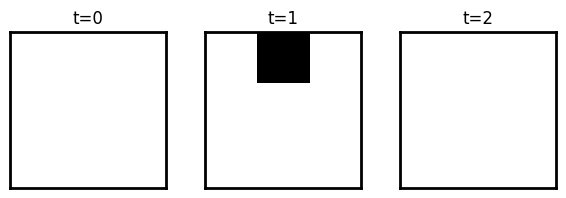

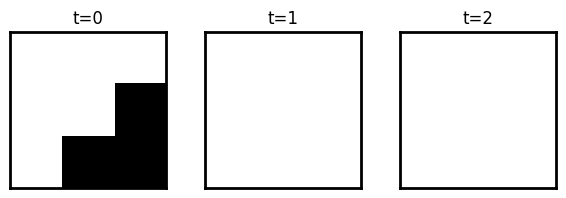

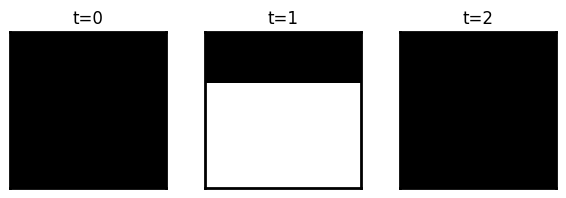

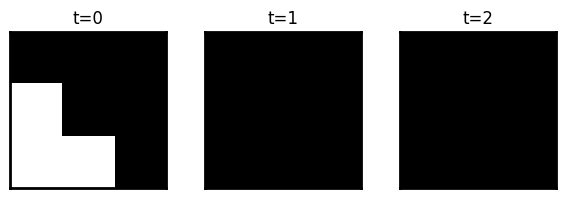

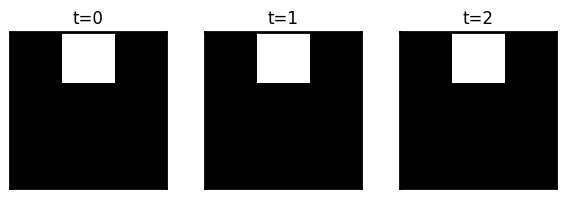

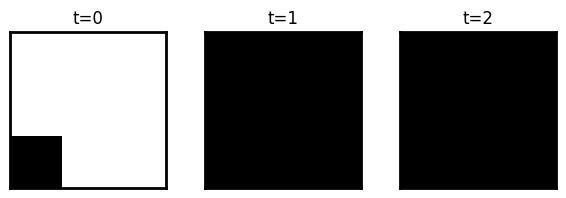

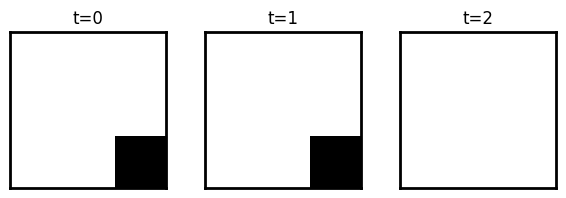

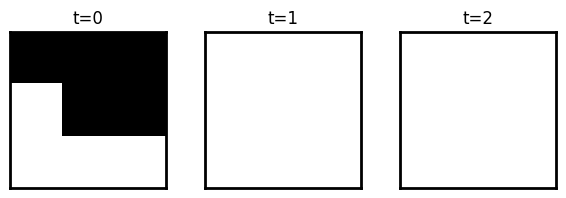

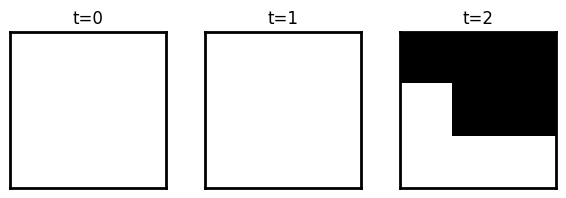

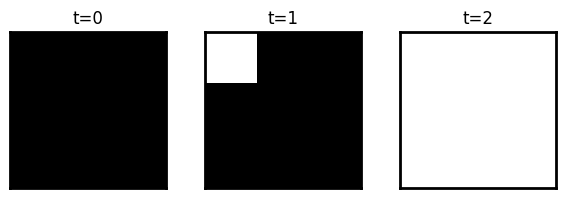

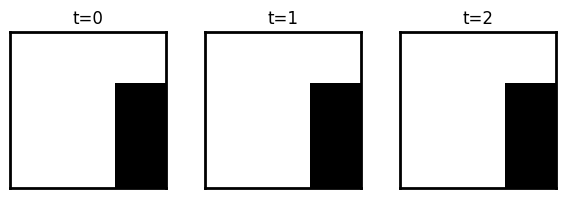

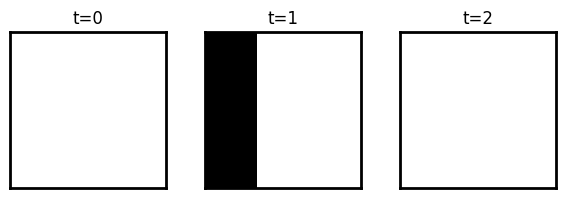

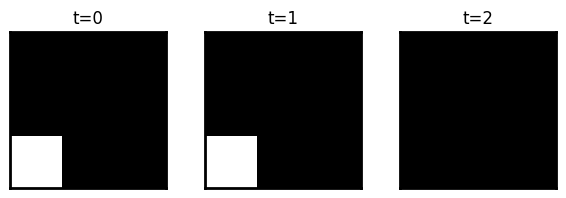

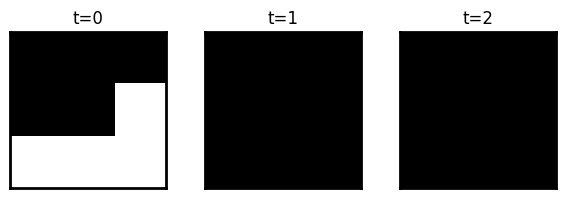

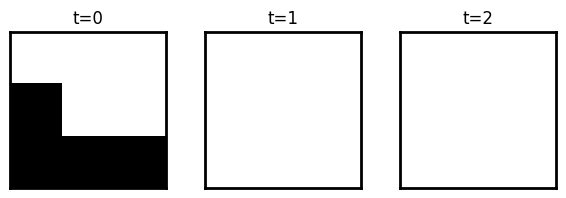

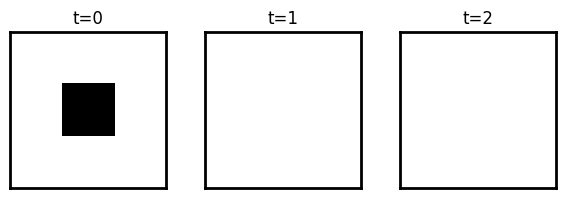

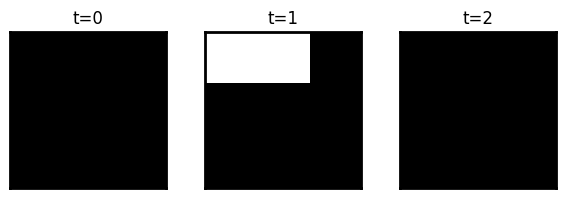

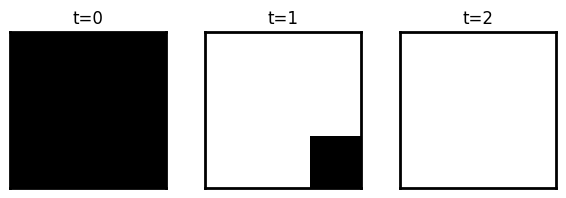

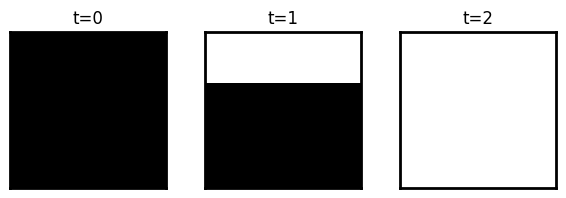

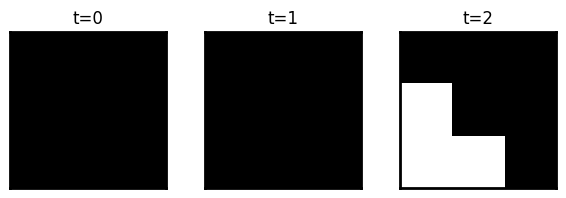

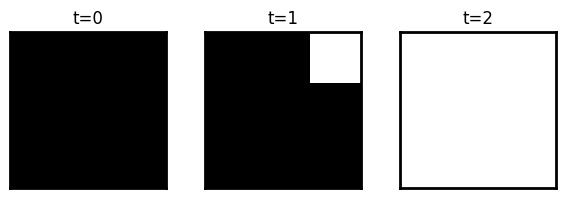

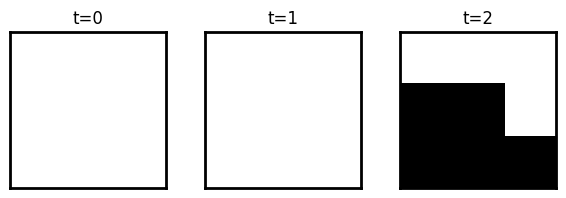

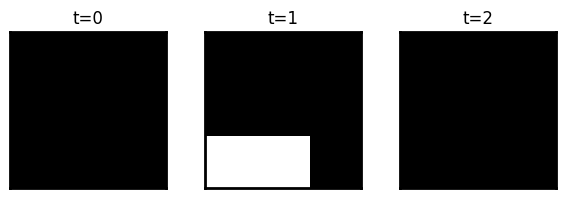

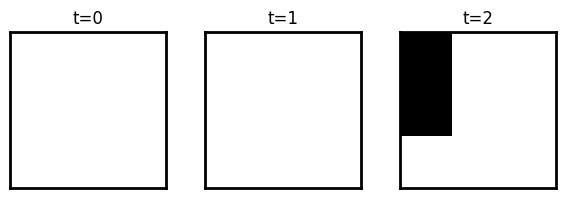

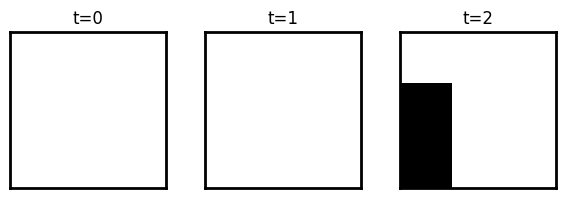

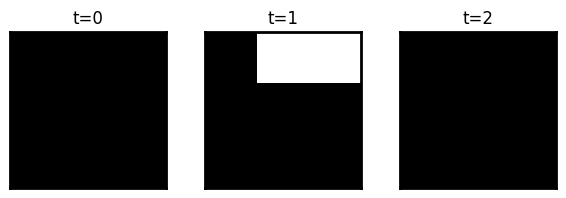

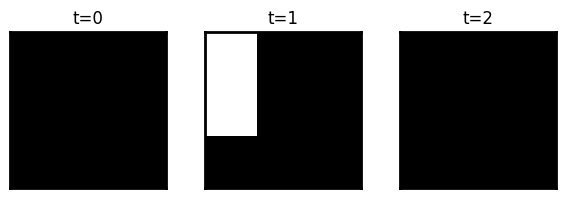

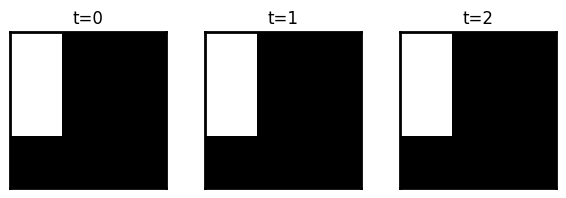

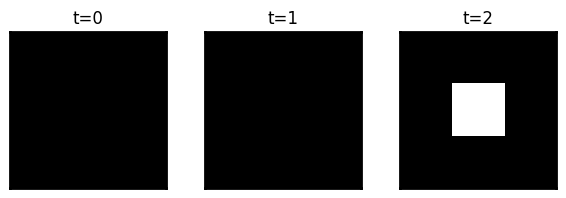

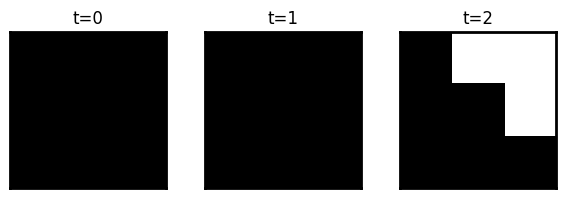

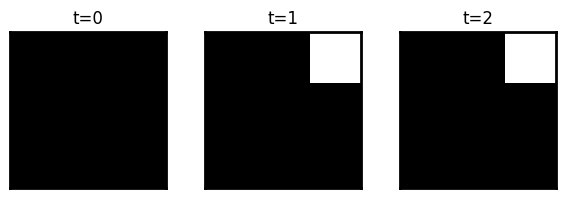

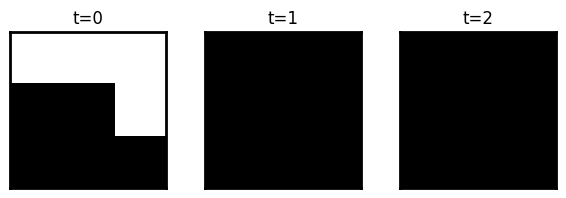

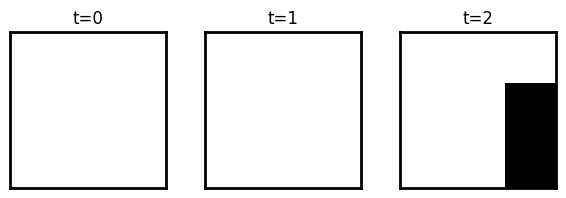

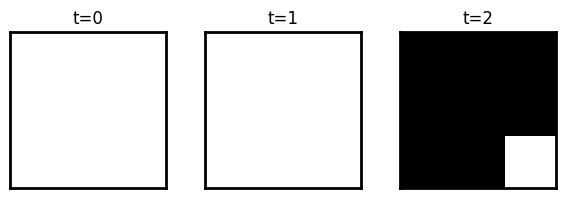

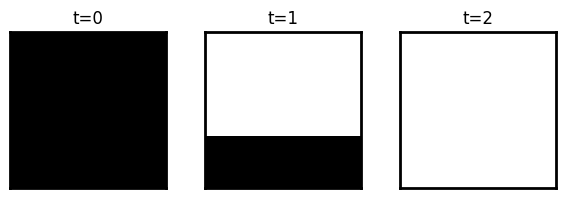

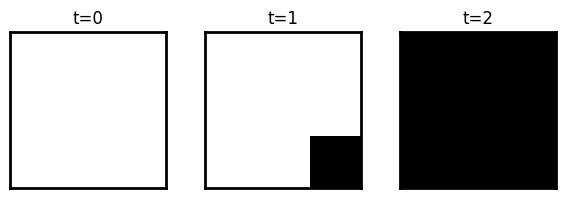

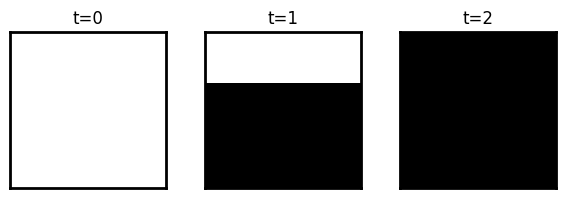

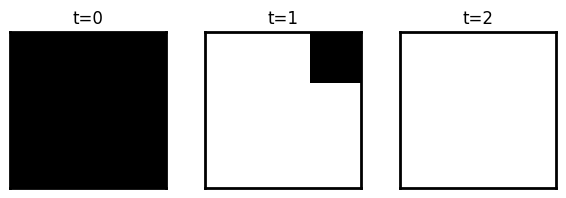

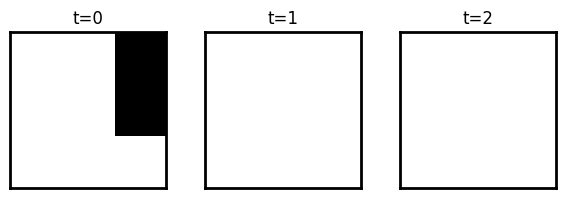

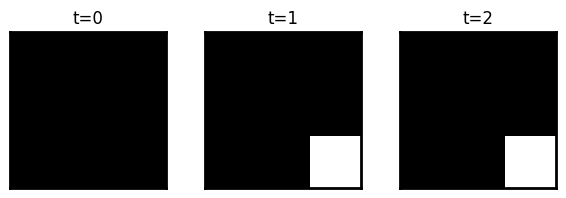

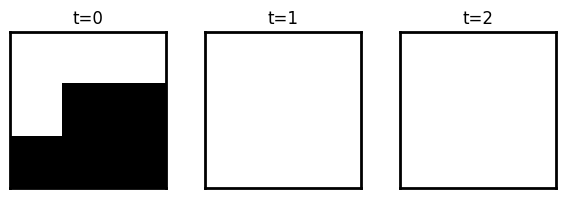

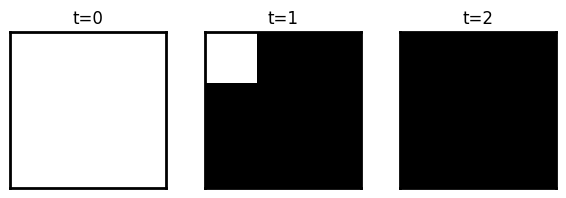

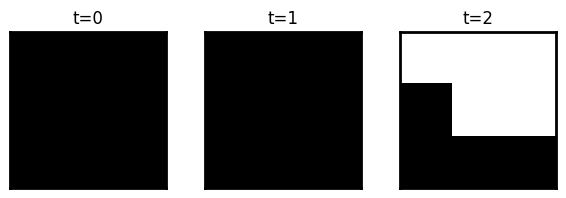

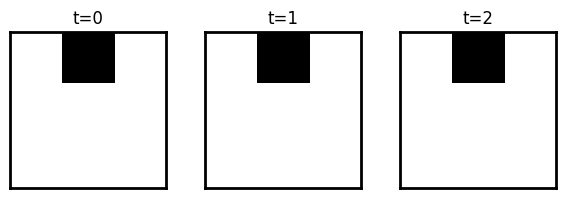

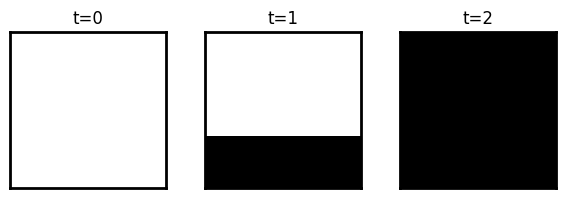

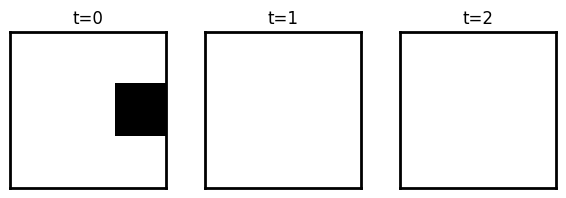

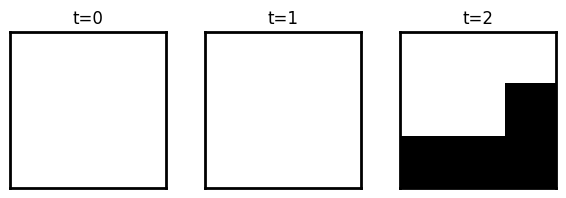

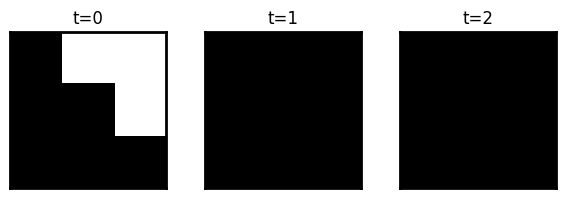

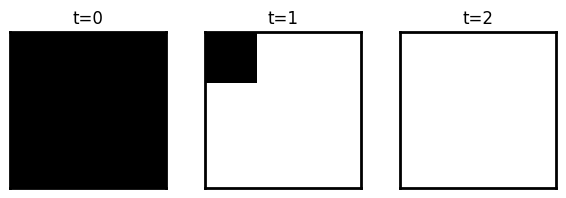

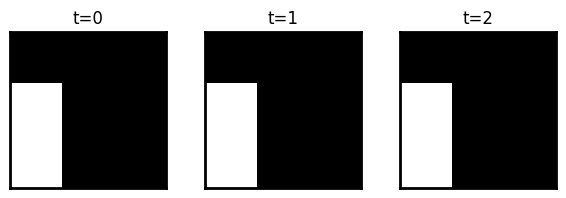

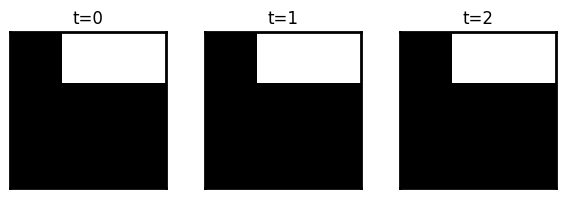

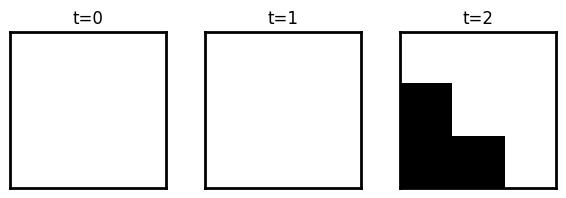

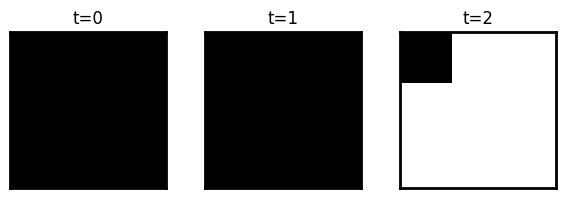

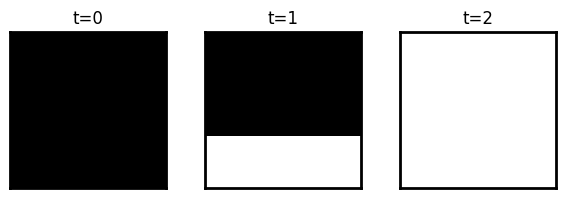

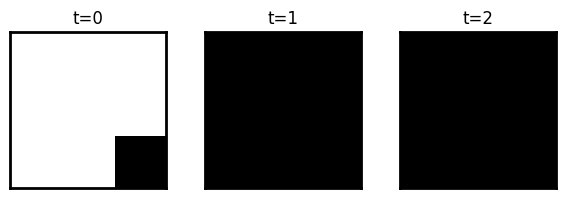

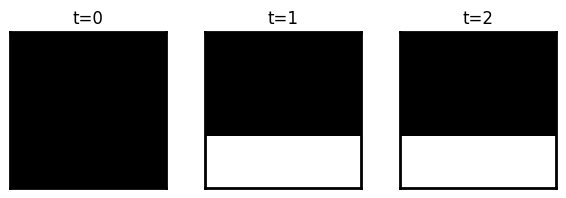

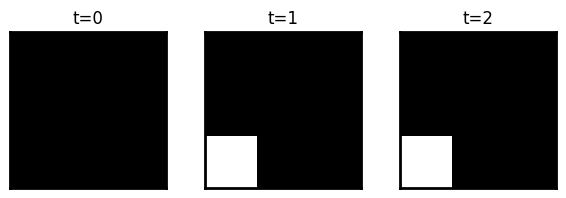

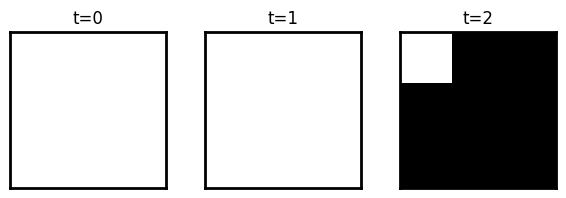

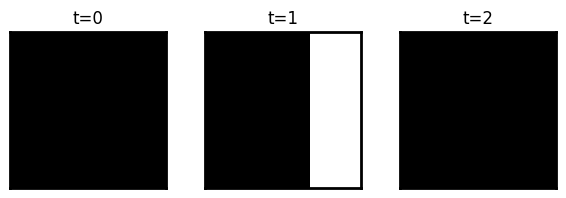

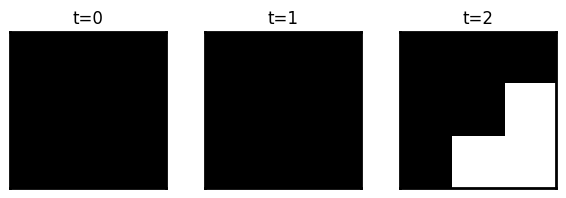

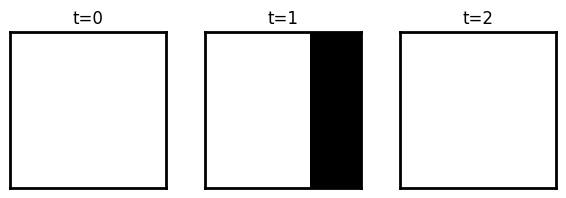

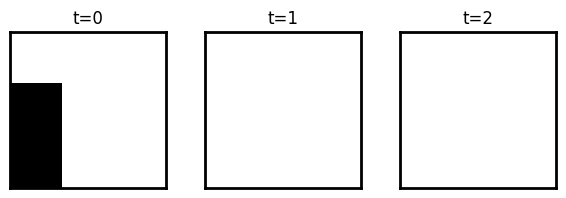

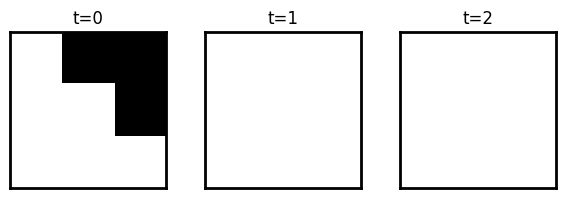

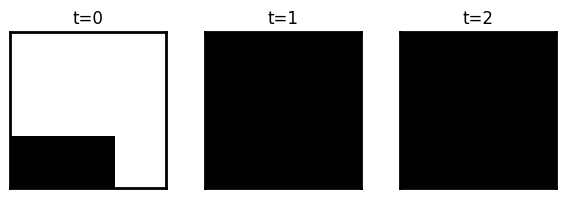

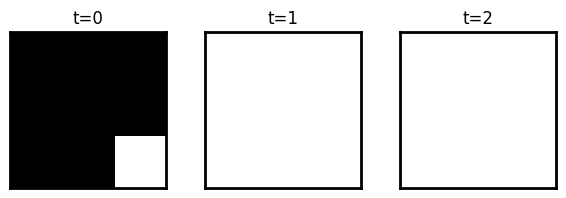

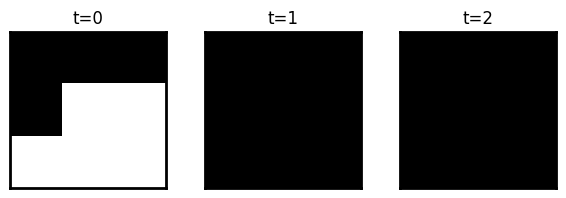

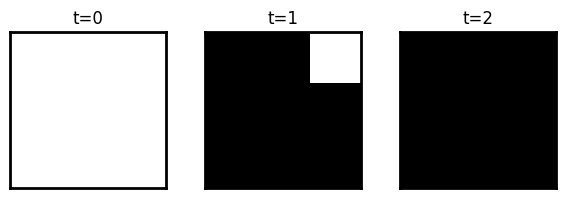

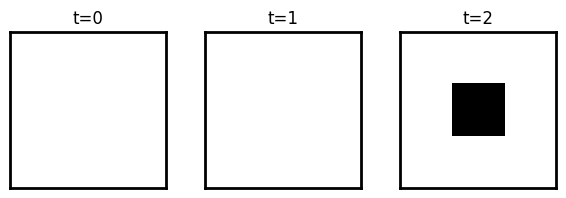

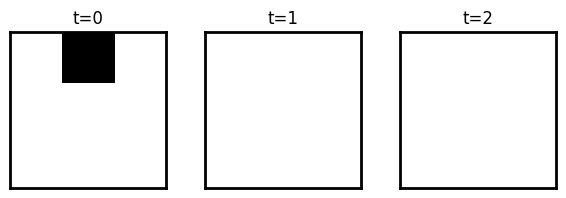

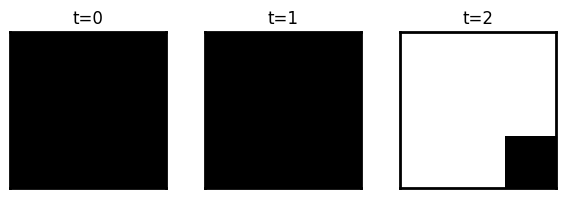

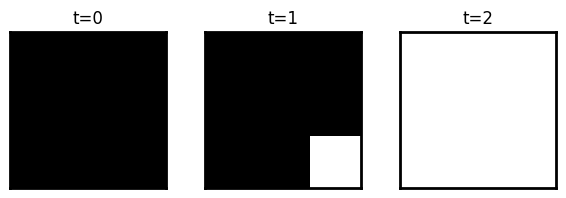

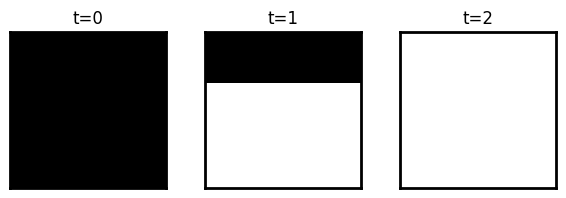

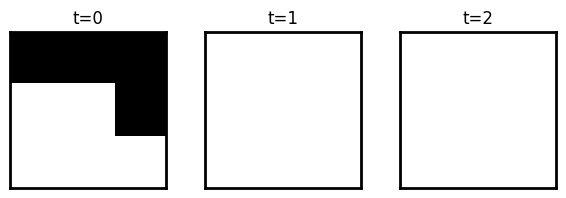

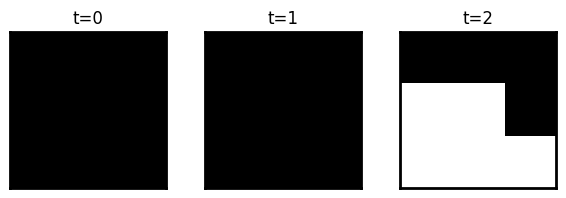

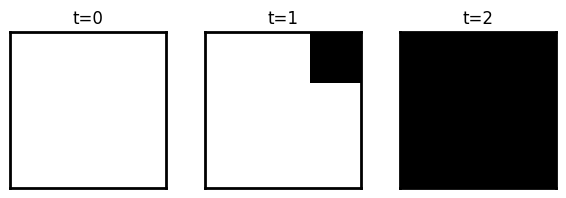

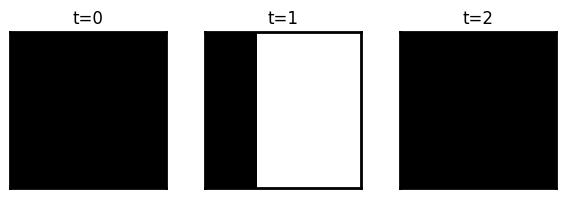

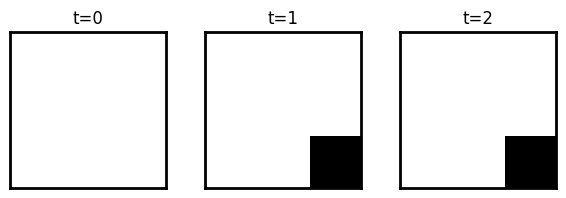

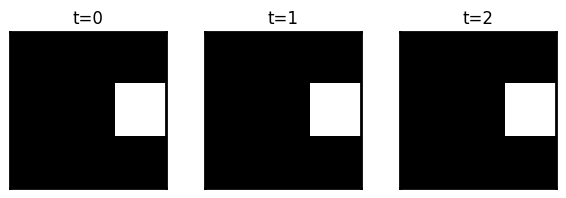

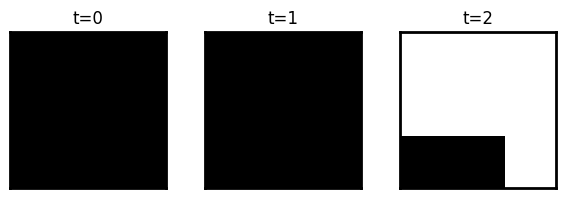

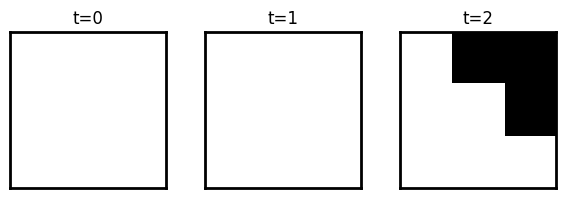

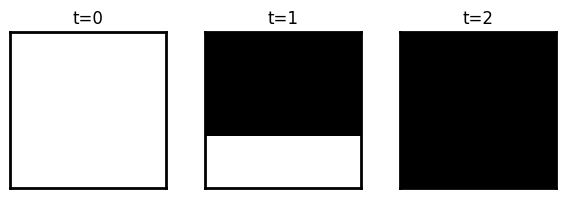

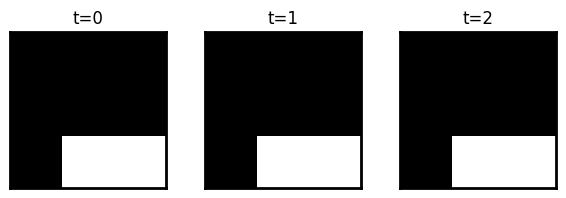

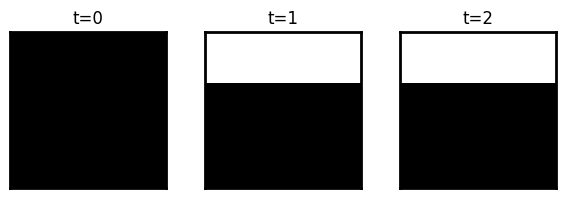

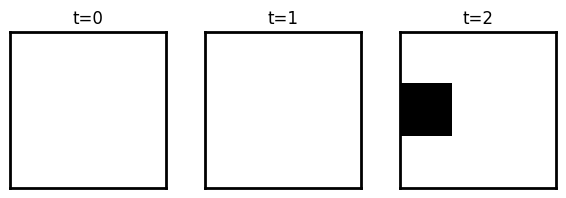

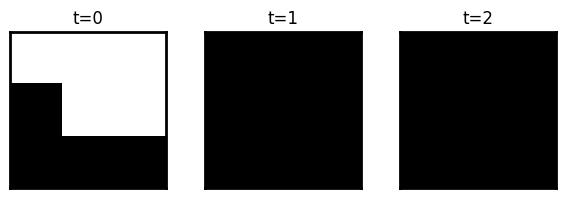

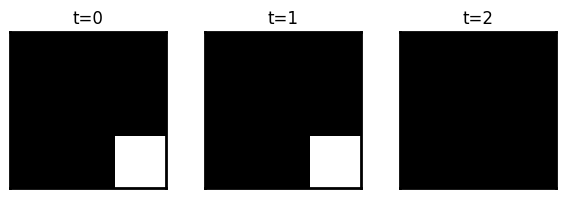

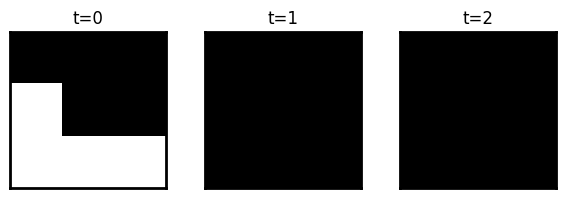

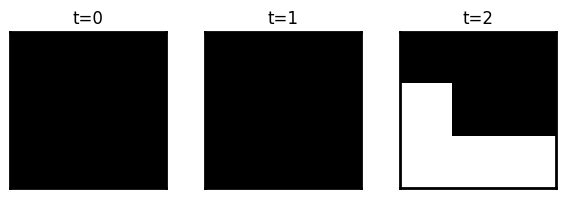

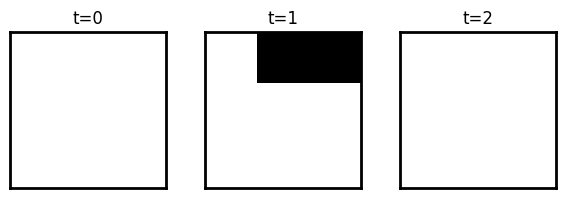

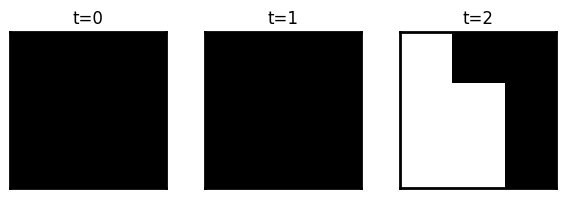

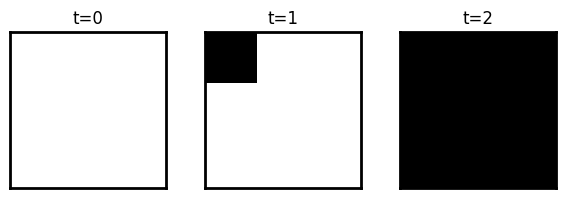

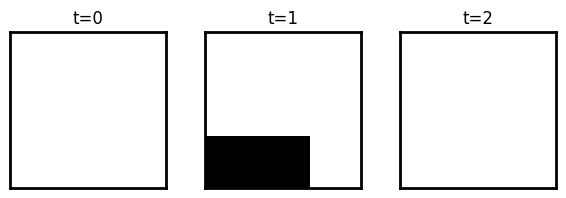

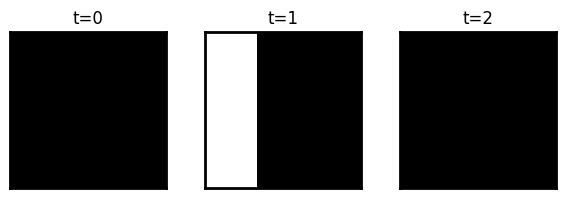

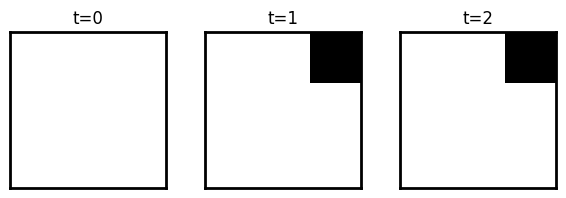

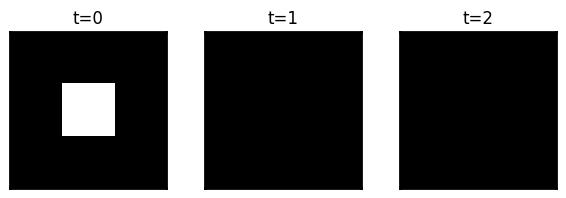

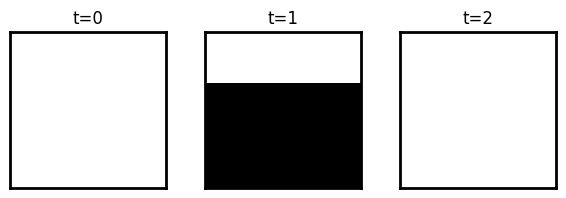

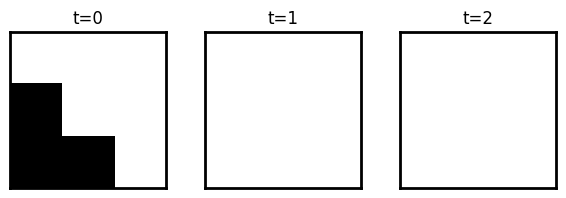

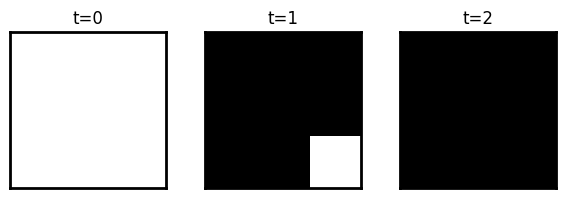

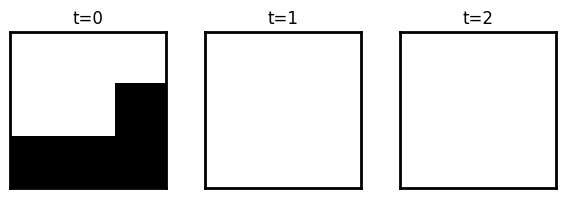

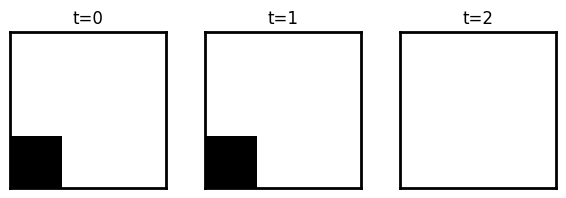

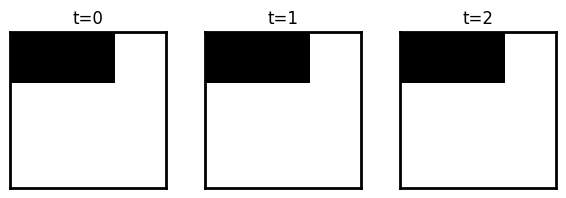

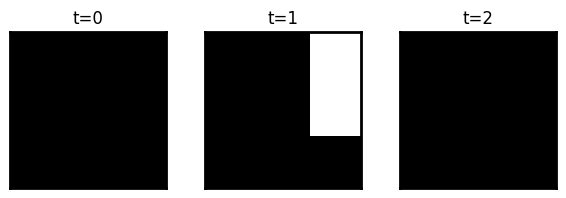

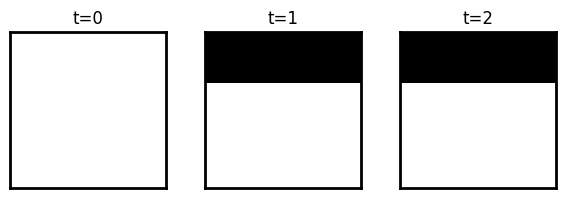

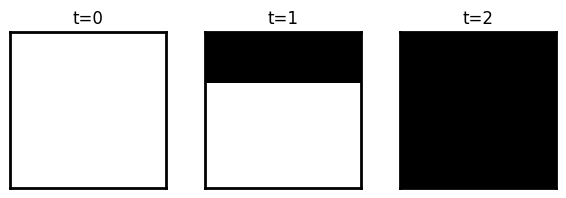

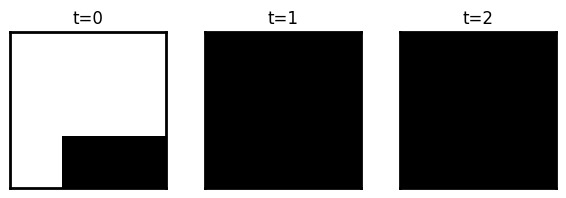

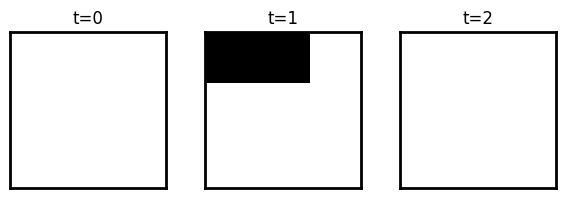

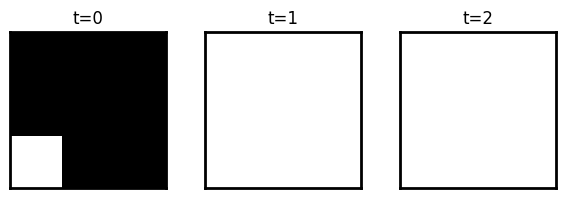

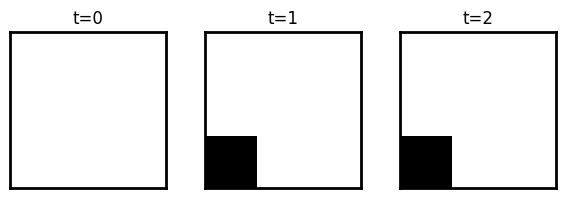

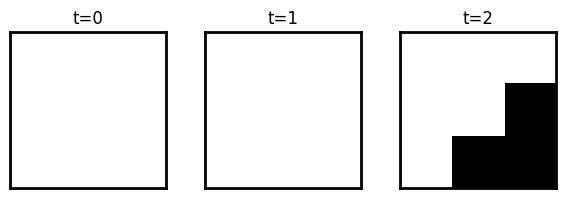

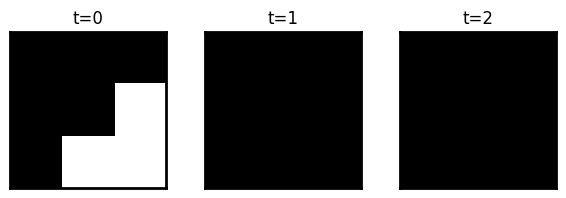

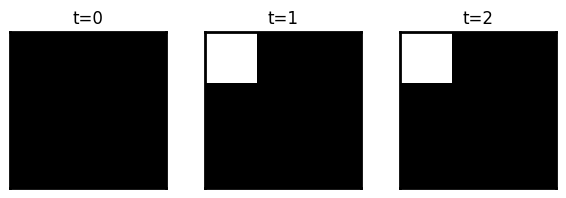

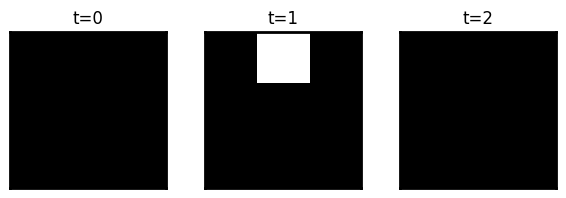

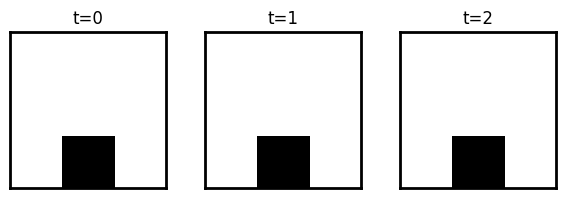

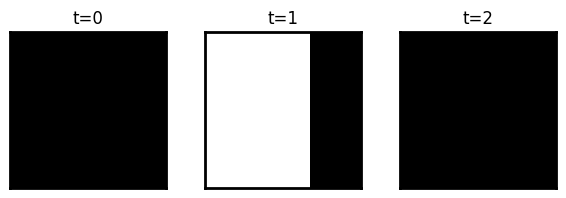

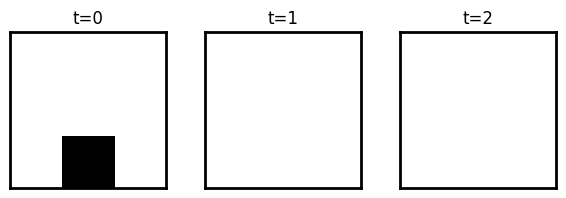

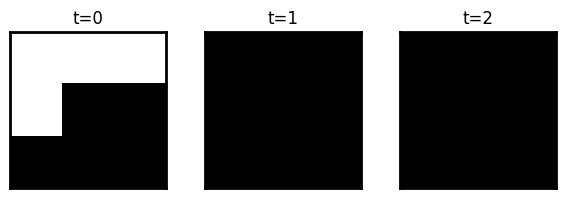

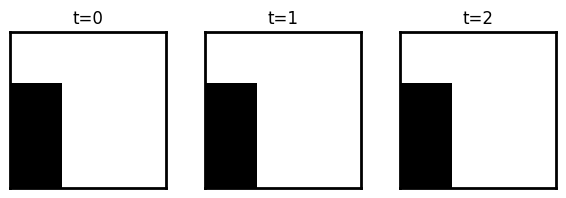

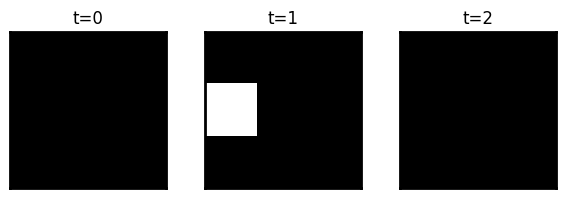

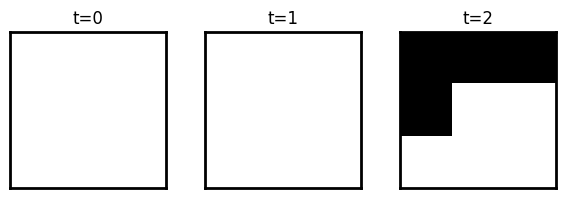

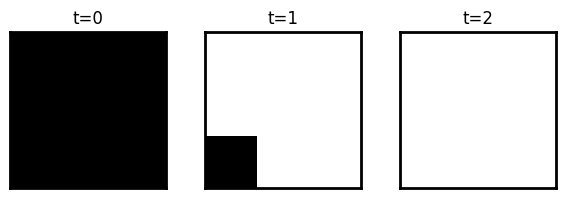

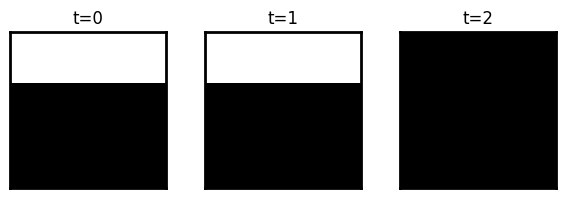

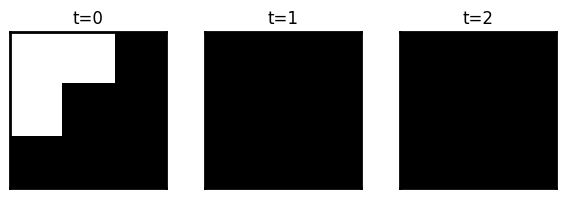

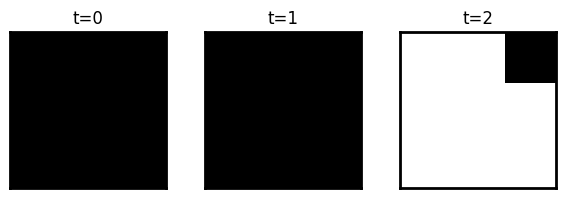

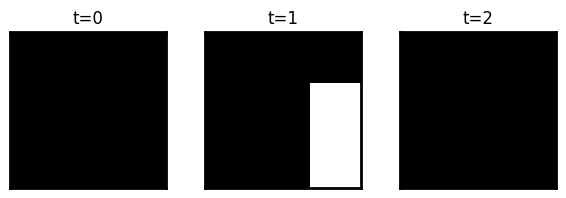

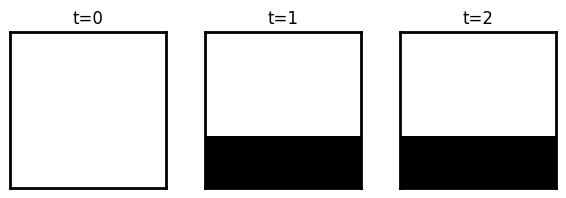

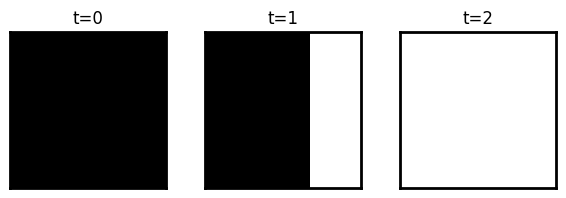

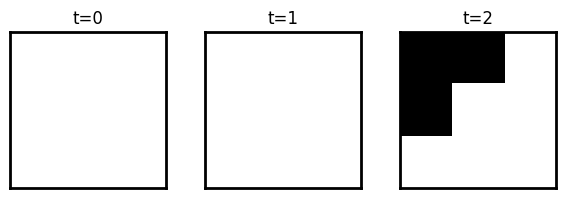

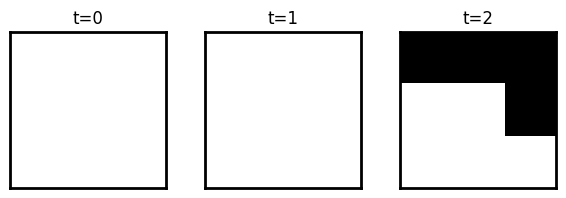

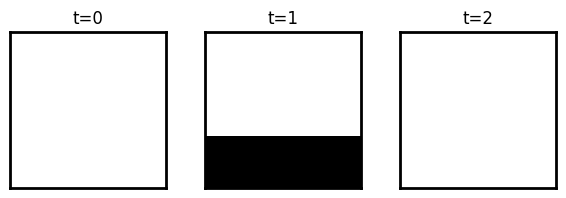

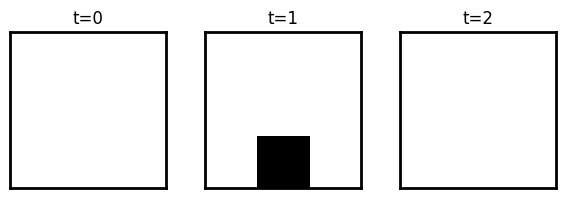

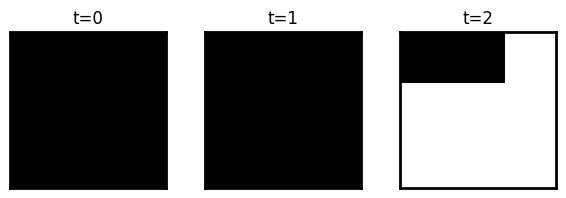

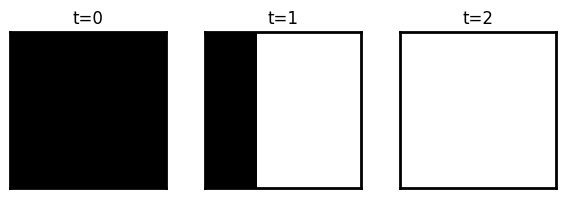

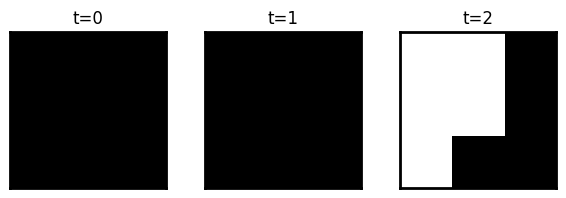

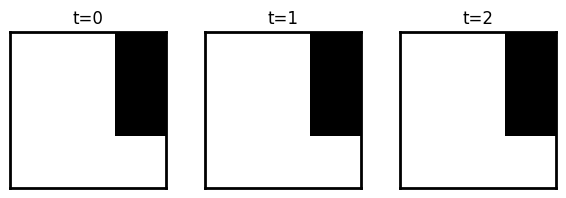

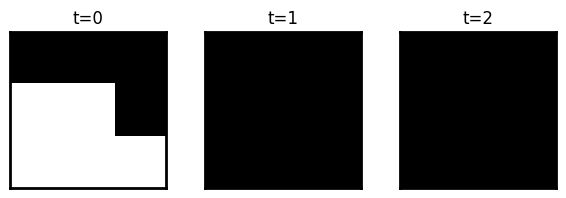

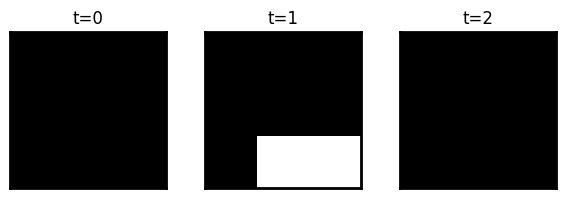

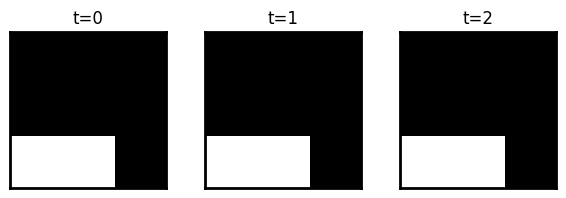

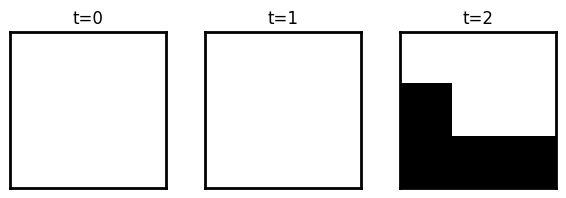

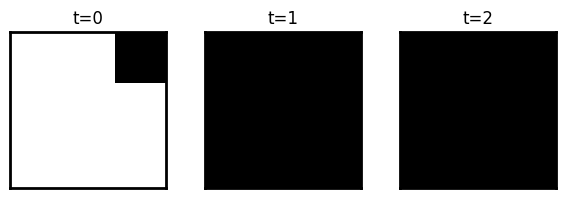

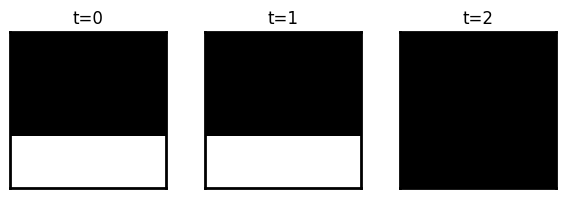

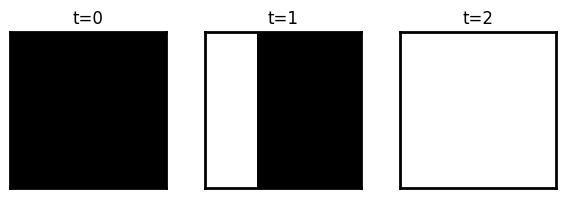

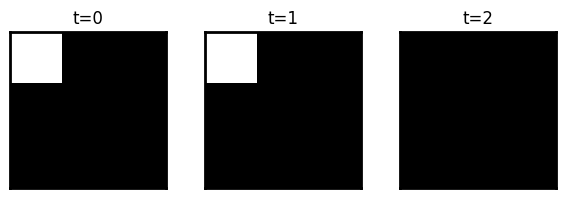

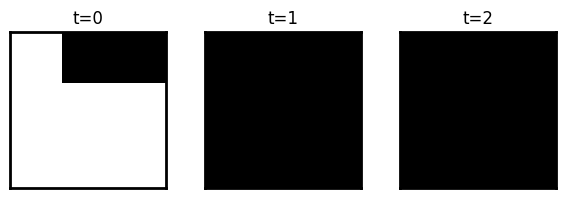

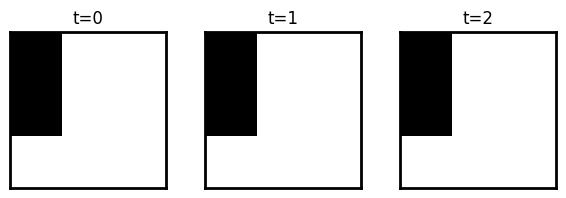

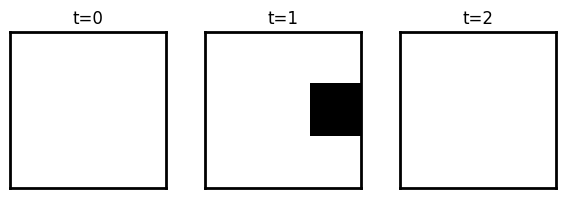

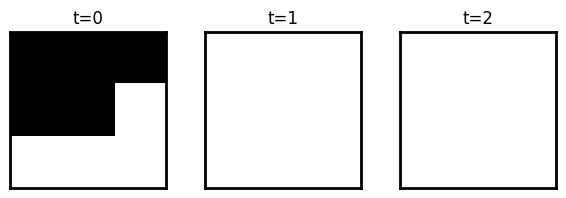

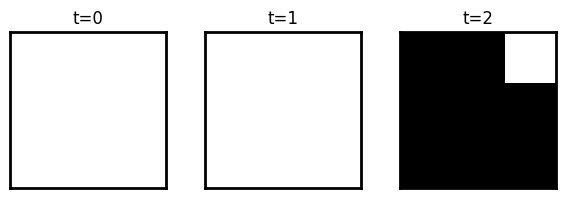

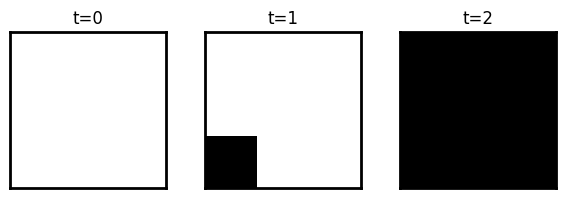

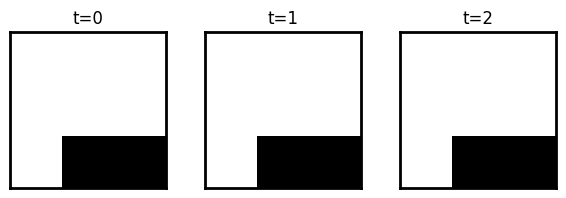

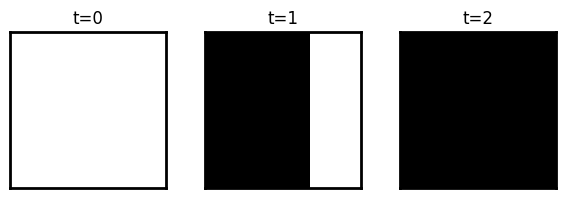

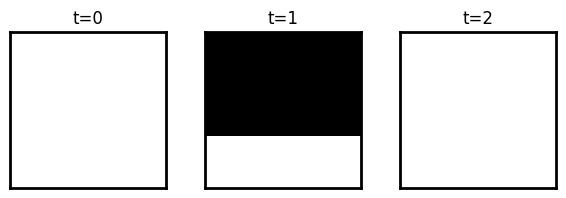

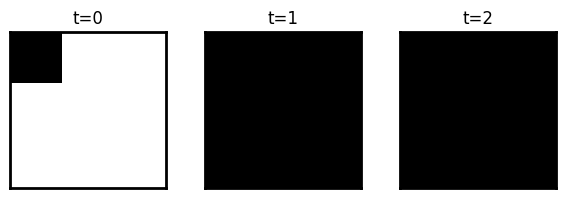

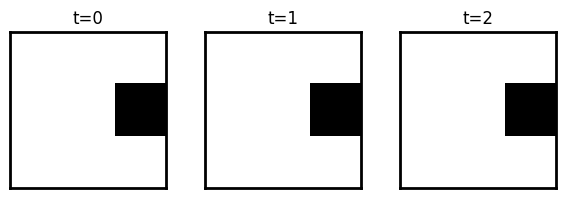

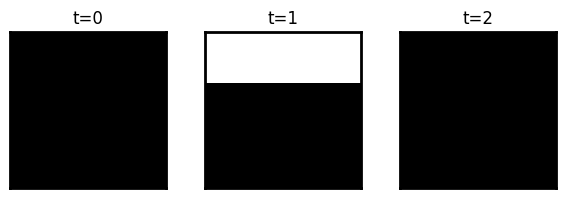

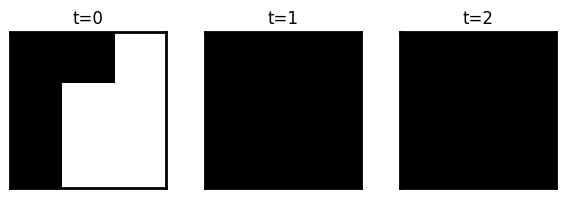

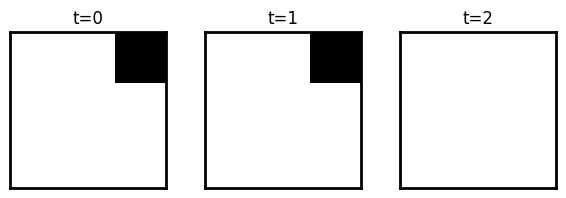

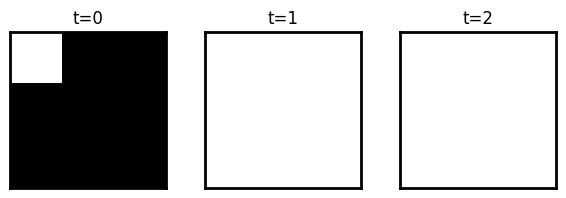

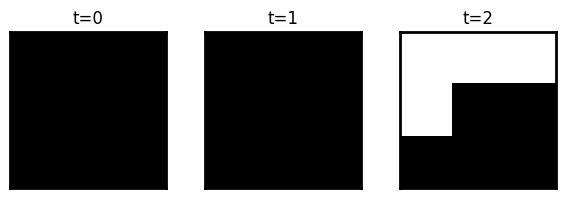

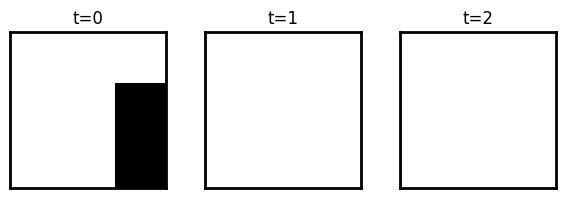

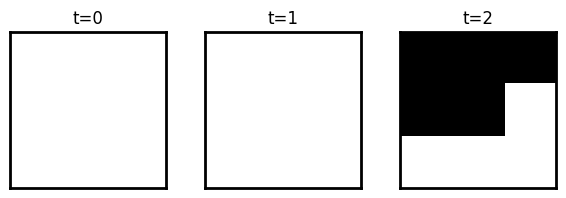

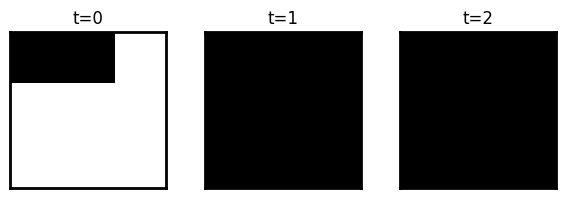

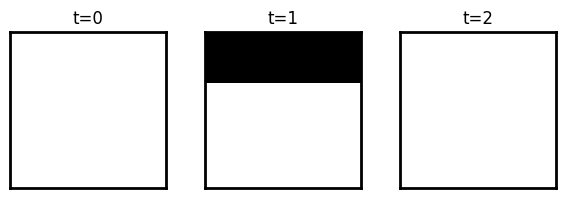

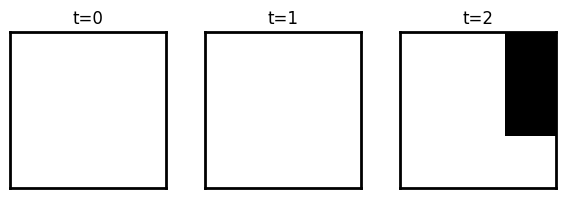

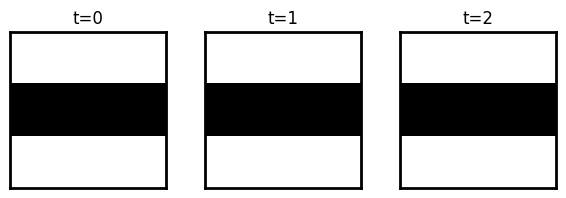

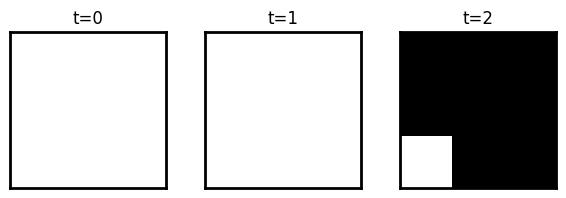

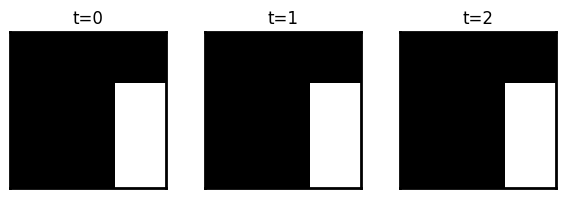

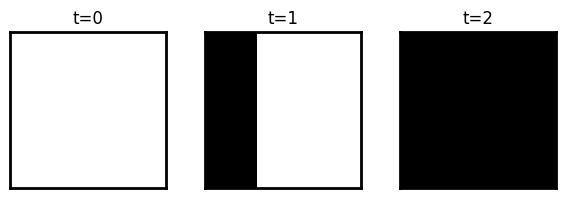

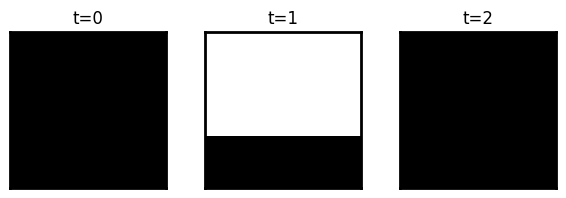

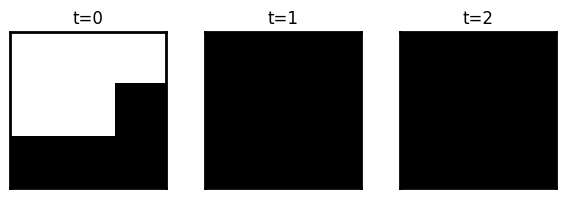

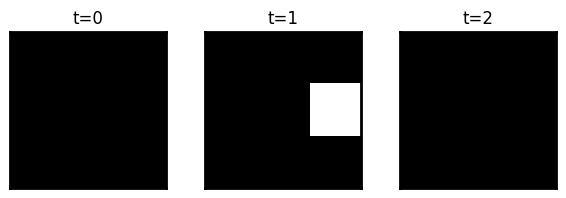

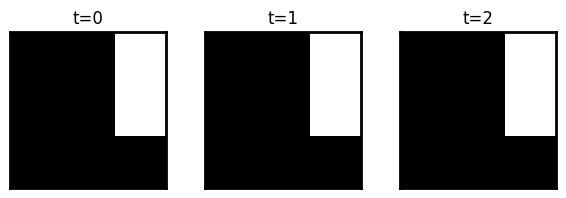

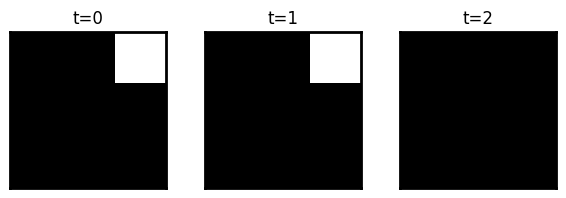

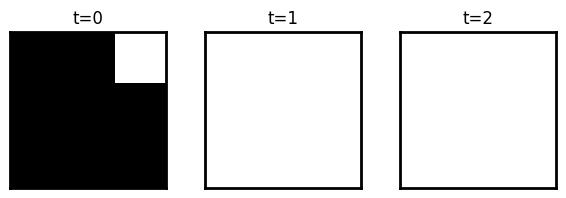

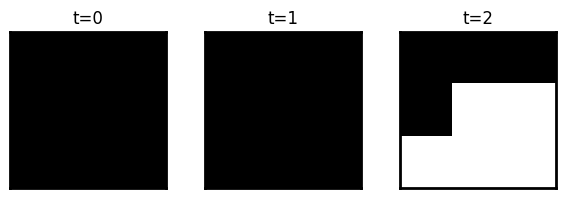

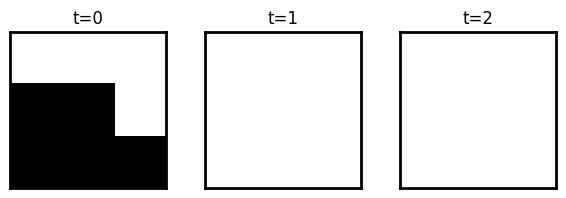

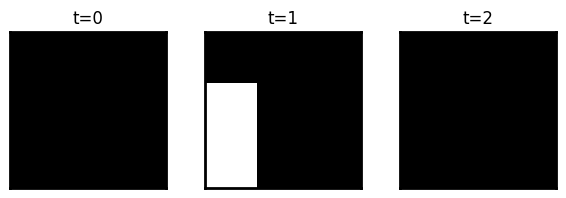

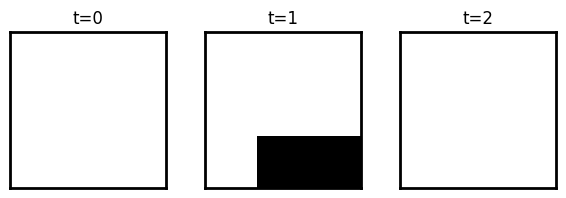

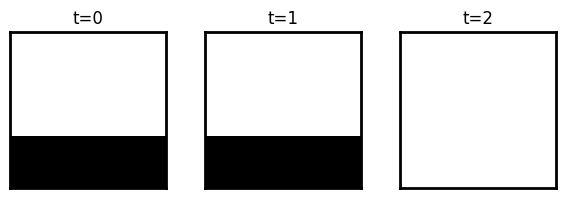

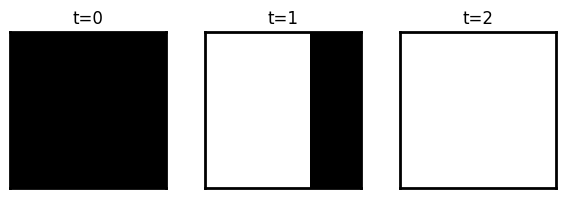

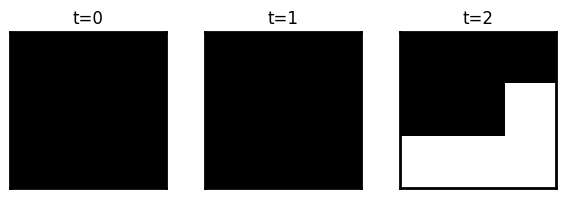

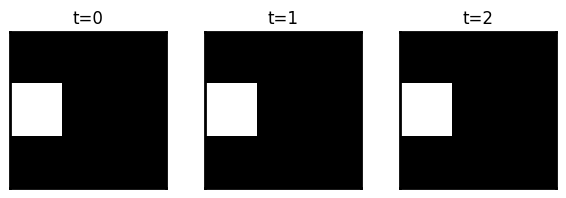

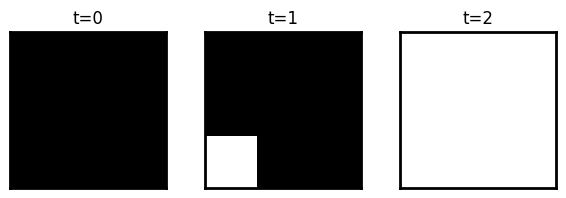

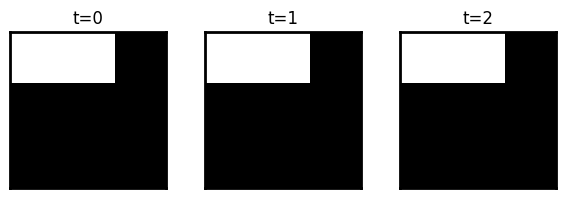

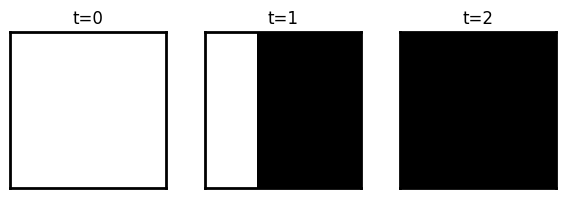

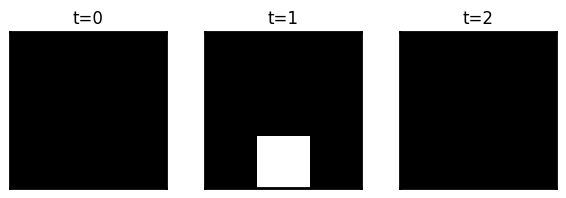

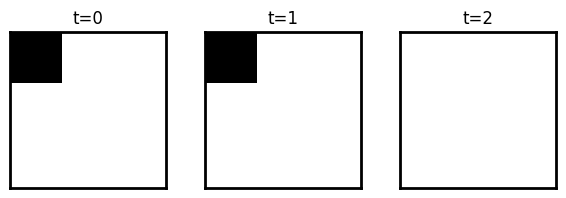

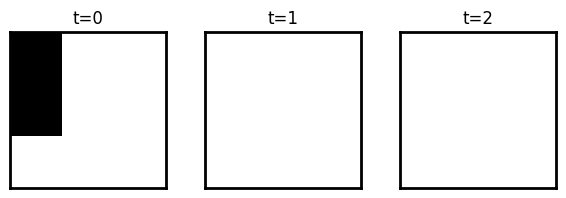

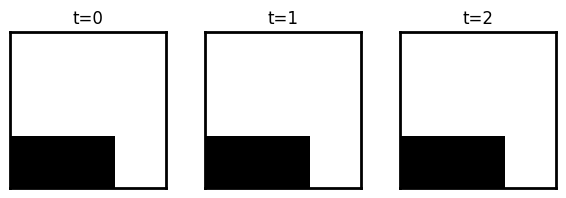

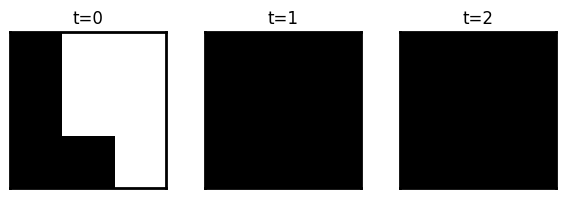

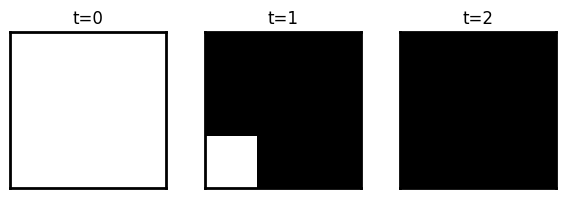

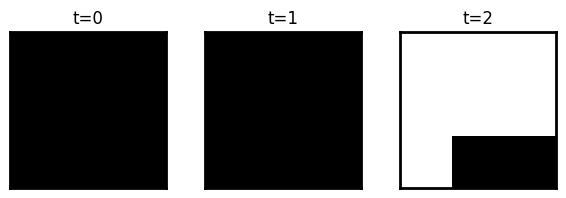

In [1]:
from pathlib import Path

# Siamo in notebooks/, saliamo di un livello per arrivare alla root del progetto
ROOT = Path().resolve().parents[0]
DATA_DIR = ROOT / "examples" / "data"

from motionpattern.pattern_table import *
from motionpattern.plot_pattern import *

table = ImportData(
    path=DATA_DIR / "topk_riconteggio.csv",
    real_counting=True,
    TimeFilter=3,
    SpaceFilter=3,
)

Max_W = 0.05
Max_N = 300

table_heur = apply_heuristic(
    df=table,
    Max_W=Max_W,
    Max_N=Max_N,
    inplace=False,  # usa una copia della tabella
)



# Codifiche numeriche dei pattern selezionati
patterns_heur = table_heur.get_PatternsValue(masked=True)

print(patterns_heur)
for patt in patterns_heur:
        arr = plot_pattern(
        pattern_value=patt,
        TimeFilter=3,
        SpaceFilter=3,
        show=True,   # mostra la figura
        save=False,  # non salva su disco
        save_dir=None,
        filename=None,
    )
